<a href="https://colab.research.google.com/github/jungyoojang/MachineLearning/blob/main/6_3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

너무 많은 데이터로 인해 저장공간이 부족한 경우, 군집이나 분류에 영향을 끼지지 않으면서 데이터의 용량을 줄여보자.

**차원 축소(dimentionally reduction)**

차원이란?

다차원 배열과 1차원 배열에서 차원이란 용어는 조금 다르게 사용

다차원 배열: 차원 = 배열의 축 개수

1차원 배열: 차원 = 원소의 개수-> 혼란을 피하기 위해 특성이라 하기로 하자

**특성이 많으면?**

장점: 선형 모델의 성능이 높아짐

단점 1: 훈련 데이터에 쉽게 과대적합됨

단점 2: 데이터 용량이 급격히 증가하여 저장 공간이 부족

단점 3: 모델 처리속도가 떨어짐



---


차원 축소는 데이터를 가장 잘 나타내는 일부 특성만을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있음

반대로, 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음. 대표적으로 주성분 분석이 있음.

## PCA 클래스

**주성분 분석(PCA, principal component analysis)**

대표적인 차원 축소 알고리즘

데이터에 있는 분산이 큰 방향을 찾는 것

분산은 데이터가 널리 퍼져있는 정도

분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터(데이터를 표현하는 데 적합)

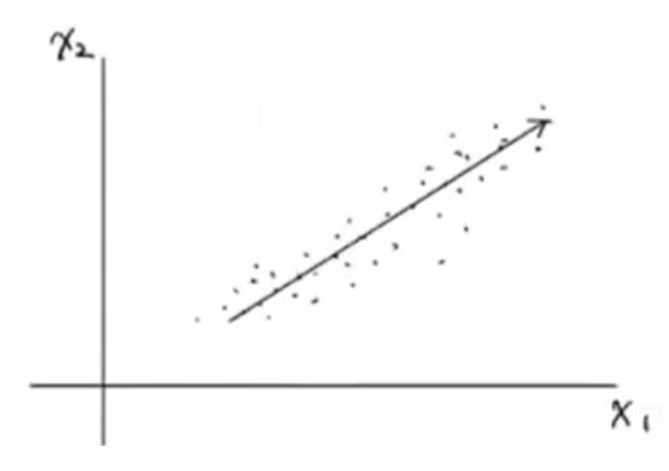

In [ ]:
# 데이터 준비
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-30 02:26:06--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 02:26:06--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 02:26:06--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

- sklearn,decompositionPCA 클래스: 주성분 분석 알고리즘

- n_components: 찾을 주성분의 개수를 지정하는 매개변수(필수)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 주성분 50개를 찾음
pca.fit(fruits_2d) # fit으로 훈련

PCA(n_components=50)

첫 번째 차원은 50. 즉, 50개의 주성분을 찾음.

두 번째 차원은 항상 원본 데이터의 특성 개수와 같으므로 10000

주의할 점: 주성분 벡터의 크기는 원본 데이터와 동일함

In [ ]:
print(pca.components_.shape) # 50개의 주성분을 찾았고, 각 주성분들은 원소를 10000개씩 갖고 있음

(50, 10000)


주성분을 이미지처럼 출력해보자

이전 절에서만든 draw_fruits() 함수 사용

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

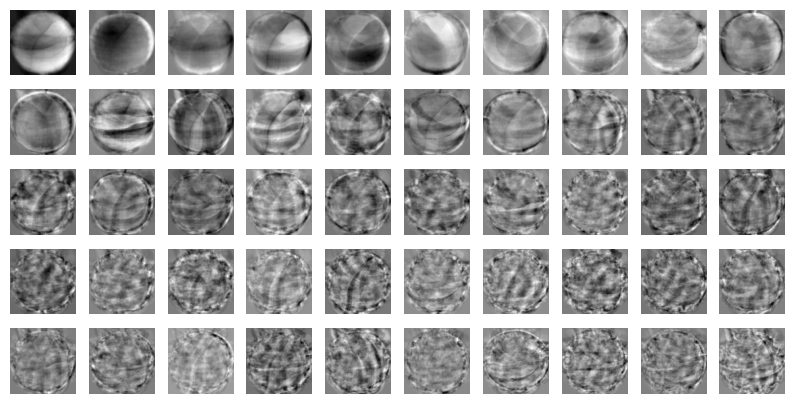

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) # 100 by 100

원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄

데이터 세트에 있는 어떤 특징을 잡아낸 것으로 생각할 수 있음


찾아낸 주성분을 이용하여 원본 데이터의 특성을 50으로 줄여보자

In [ ]:
print(fruits_2d.shape) # 300개 샘플 각각에 10000개의 특성

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d) # 주성분으로 차원축소

In [ ]:
print(fruits_pca.shape) # 특성 개수가 50개로 줄어듦

(300, 50)


## 원본 데이터 재구성

앞에선 특성 개수를 줄였다면(10000→50), 반대로 원본 데이터를 복원(50→10000)할 수도 있음.

- inverse_transform(): 주성분을 바탕으로 원본 데이터를 재구성해주는 메소드

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca) # (300,50)의 배열을 다시 복원
print(fruits_inverse.shape) # 특성 10000개로 늘어남

(300, 10000)


복원한 데이터를 그림으로 출력

일부 흐리거나 번진 부분은 압축할 때 손실된 부분

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

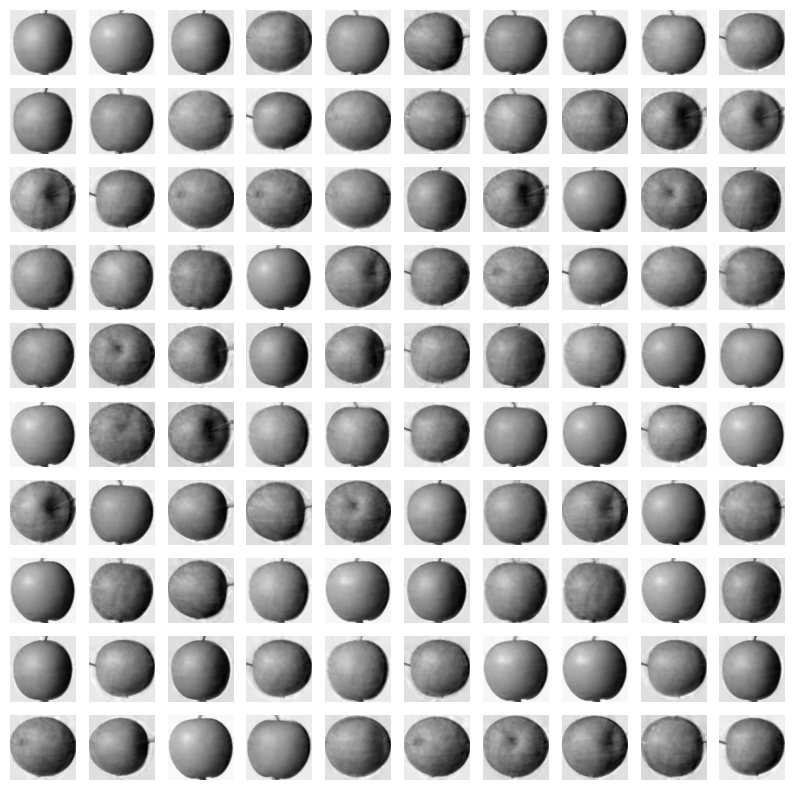

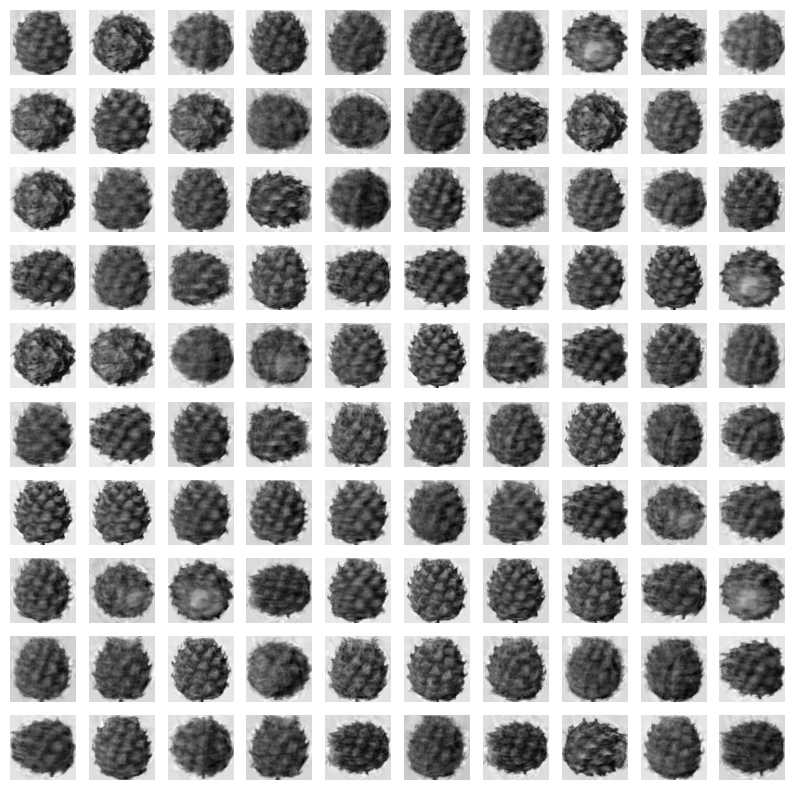

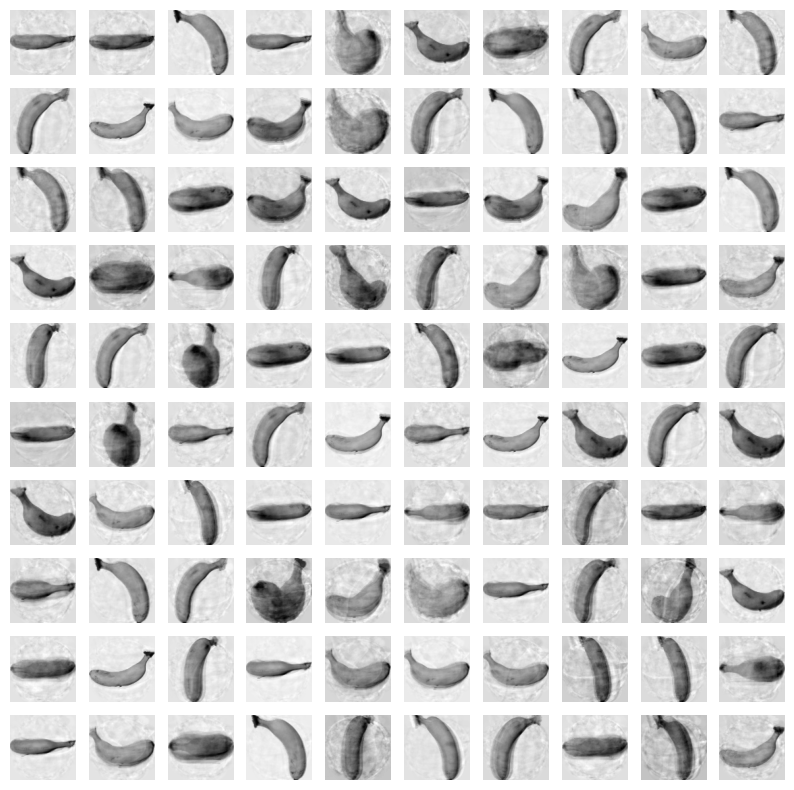

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

**설명된 분산(explained varience)**

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

- explained_variance_ratio_: 각 주성분의 설명된 분산 비율이 저장되어 있음

In [ ]:
# 이 값을 sum으로 다 더하면 주성분 50개가 설명하는 총 분산 비율을 얻을 수 있음
print(np.sum(pca.explained_variance_ratio_))

0.9215229224750797


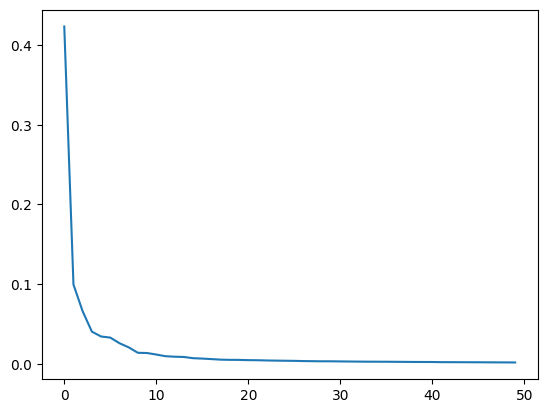

In [ ]:
# 설명된 분산 비율을 그래프로 표시
# 적절한 주성분 개수를 찾는 데도 도움됨
plt.plot(pca.explained_variance_ratio_)

처음 10개의 주성분이 대부분의 분산을 표현하고 있음

## 다른 알고리즘과 함께 사용하기

**분류 알고리즘 (로지스틱 회귀)**

3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용해봄

지도 학습 모델이므로 타깃값을 설정

사과 = 0, 파인애플 = 1, 바나나 = 2

In [ ]:
from sklearn.linear_model import LogisticRegression # 로지스틱 모델

lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100) # 임의로 타깃값 생성

먼저 원본 데이터로 훈련해서 검증

In [ ]:
# 원본 데이터인 fruits_2d 사용
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target) # 원본, 타깃 전달
print(np.mean(scores['test_score'])) # 점수 출력
print(np.mean(scores['fit_time'])) # 훈련 시간 초 단위로 출력

0.9966666666666667
2.2627578258514403


다음으로 PCA 차원축소한 데이터로 훈련해서 검증

In [ ]:
# PCA로 축소한 fruits_pca 사용
scores = cross_validate(lr, fruits_pca, target) # 입력 데이터만 바꿈
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.04051461219787598


PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음

**분산의 비율로 주성분 찾기**

주성분의 개수 대신 분산의 비율로 주성분을 찾을 수 있음

설명된 분산의 50%에 달하는 주성분을 찾아보자

n_components 매개변수에 원하는 설명된 분산 비율 입력 가능

In [ ]:
pca = PCA(n_components=0.5) # 원본의 50%만 축소
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_) # 주성분 2개

2


원본 데이터 변환

In [ ]:
# 주성분 2개짜리 pca 모델로 원본데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 특성 2개 확인

(300, 2)


교차검증 수행

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9933333333333334
0.07036418914794922


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

2개의 특성 만으로도 99%의 정확도 달성

**군집 알고리즘(k-평균)**

In [ ]:
from sklearn.cluster import KMeans # k-평균

km = KMeans(n_clusters=3, random_state=42) # 모델 생성
km.fit(fruits_pca) # 2개의 특성으로 축소한 데이터로 fit

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

2절에서 원본 데이터를  사용했을 때와 거의 비슷한 결과임

(array([0,1,2], dtype=int32, array([112,98,90]))

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


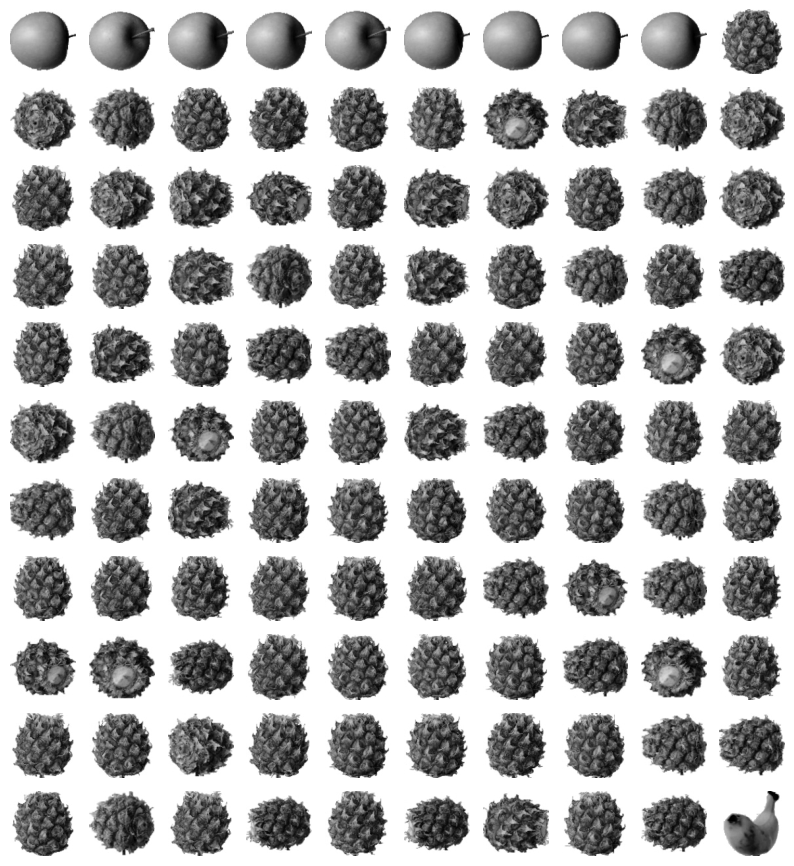

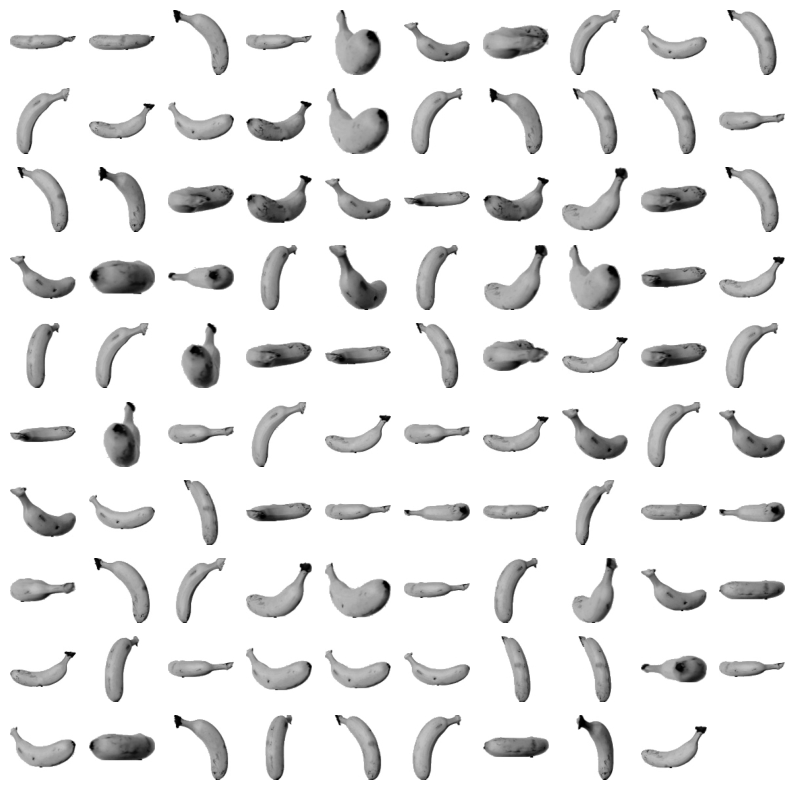

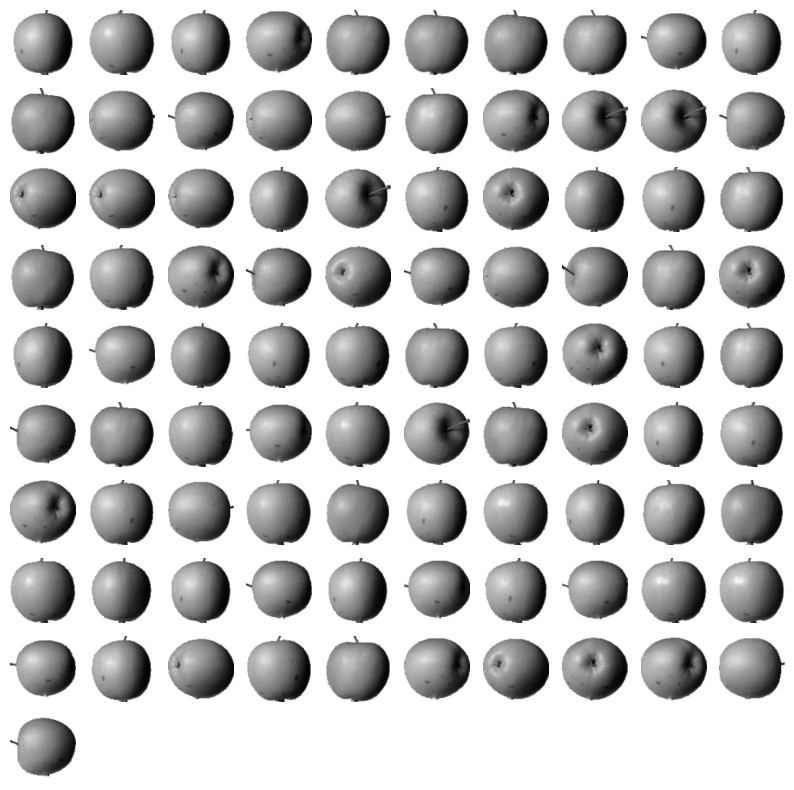

In [ ]:
# 이미지로 출력해서 확인
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

**데이터 시각화**

훈련 데이터의 차원 축소의 장점 중 하나는 시각화

3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움

km.labels_를 이용해 클러스터별로 산점도 표시



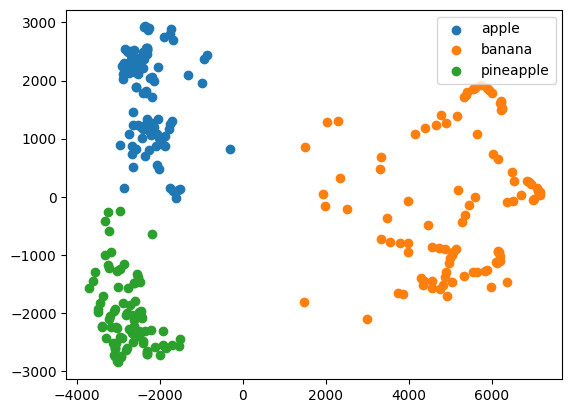

In [ ]:
for label in range(0, 3): # 클러스터 별로 나눠서 산점도 그리기
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
# x축은 첫번째 주성분, y축은 두번째 주성분
plt.show()

각 클러스트의 산점도가 잘 구분됨

실제 클래스별로 표시

차원축소 장점

1. 과대적합 억제
2. 저장공간 확보
3. 모델 처리속도 상승
4. 모델 성능 상승
5. 시각화 가능

# 정리

사진의 용량을 줄이기 위해 PCA 알고리즘 도입

-> 특성 10,000개를 잘 설명하는 주성분 50개를 찾아냄

-> 찾아낸 주성분 50개에 투영시켜, 원본데이터의 차원을 축소시킬 수 있음
(=특성 개수를 줄이니 용량이 절감됨)

-> 반대로 축소된 데이터를 원본 데이터로 복원할 수도 있었음

-> 뽑아낸 주성분들이 원본 데이터를 얼마나 설명하는지도 구해볼 수 있음

-> 다른 알고리즘과 연계하여 많이 활용되고, 시각화가 용이하다는 장점